In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e6/sample_submission.csv
/kaggle/input/playground-series-s3e6/train.csv
/kaggle/input/playground-series-s3e6/test.csv


In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Read the first CSV file
df1 = pd.read_csv('/kaggle/input/playground-series-s3e6/test.csv')

# Read the second CSV file
combined_df = pd.read_csv('/kaggle/input/playground-series-s3e6/train.csv')

# Combine the two dataframes
#combined_df = pd.concat([df1, df2])

# Write the combined dataframe to a new CSV file
#combined_df.to_csv('combined.csv', index=False)

In [4]:
combined_df

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0,5594137.1
22726,22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7,6594705.0
22727,22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0,9321511.4
22728,22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0,6584708.2


In [5]:
import pandas as pd
"""Split the data into features (X) and target (y) label sets"""
X = pd.DataFrame(combined_df.iloc[:,:-1])
y = pd.DataFrame(combined_df.iloc[:,-1])

In [6]:
X

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,22725,55825,84,1,0,70,12031,3,10,2000,0,0,4477,786,345,0,0
22726,22726,65870,88,1,0,49,23197,9,9,2015,0,1,4811,2454,755,0,7
22727,22727,93192,42,1,0,39,8539,10,5,2014,1,0,5595,4072,789,0,0
22728,22728,65797,86,1,0,89,23197,2,10,2000,1,0,5358,2513,411,0,0


In [7]:
y

,price
0,3436795.2
1,9519958.0
2,9276448.1
3,9725732.2
4,6181908.8
...,...
22725,5594137.1
22726,6594705.0
22727,9321511.4
22728,6584708.2


In [8]:
print(combined_df.columns.values)

['id' 'squareMeters' 'numberOfRooms' 'hasYard' 'hasPool' 'floors'
 'cityCode' 'cityPartRange' 'numPrevOwners' 'made' 'isNewBuilt'
 'hasStormProtector' 'basement' 'attic' 'garage' 'hasStorageRoom'
 'hasGuestRoom' 'price']


In [9]:
combined_df.value_counts()

id     squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  basement  attic  garage  hasStorageRoom  hasGuestRoom  price    
0      34291         24             1        0        47      35693     2              1              2000  0           1                  8         5196   369     0               3             3436795.2    1
15182  95012         58             0        1        36      83575     10             6              1993  1           1                  5171      731    501     0               9             9507621.3    1
15158  80837         86             0        1        46      66463     8              1              1993  1           0                  8308      2300   263     1               1             8089906.3    1
15157  76204         3              1        1        18      98123     2              5              2000  0           0                  3806      901    158     1    

In [10]:
combined_df.shape

(22730, 18)

In [11]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 22730 non-null  int64  
 1   squareMeters       22730 non-null  int64  
 2   numberOfRooms      22730 non-null  int64  
 3   hasYard            22730 non-null  int64  
 4   hasPool            22730 non-null  int64  
 5   floors             22730 non-null  int64  
 6   cityCode           22730 non-null  int64  
 7   cityPartRange      22730 non-null  int64  
 8   numPrevOwners      22730 non-null  int64  
 9   made               22730 non-null  int64  
 10  isNewBuilt         22730 non-null  int64  
 11  hasStormProtector  22730 non-null  int64  
 12  basement           22730 non-null  int64  
 13  attic              22730 non-null  int64  
 14  garage             22730 non-null  int64  
 15  hasStorageRoom     22730 non-null  int64  
 16  hasGuestRoom       227

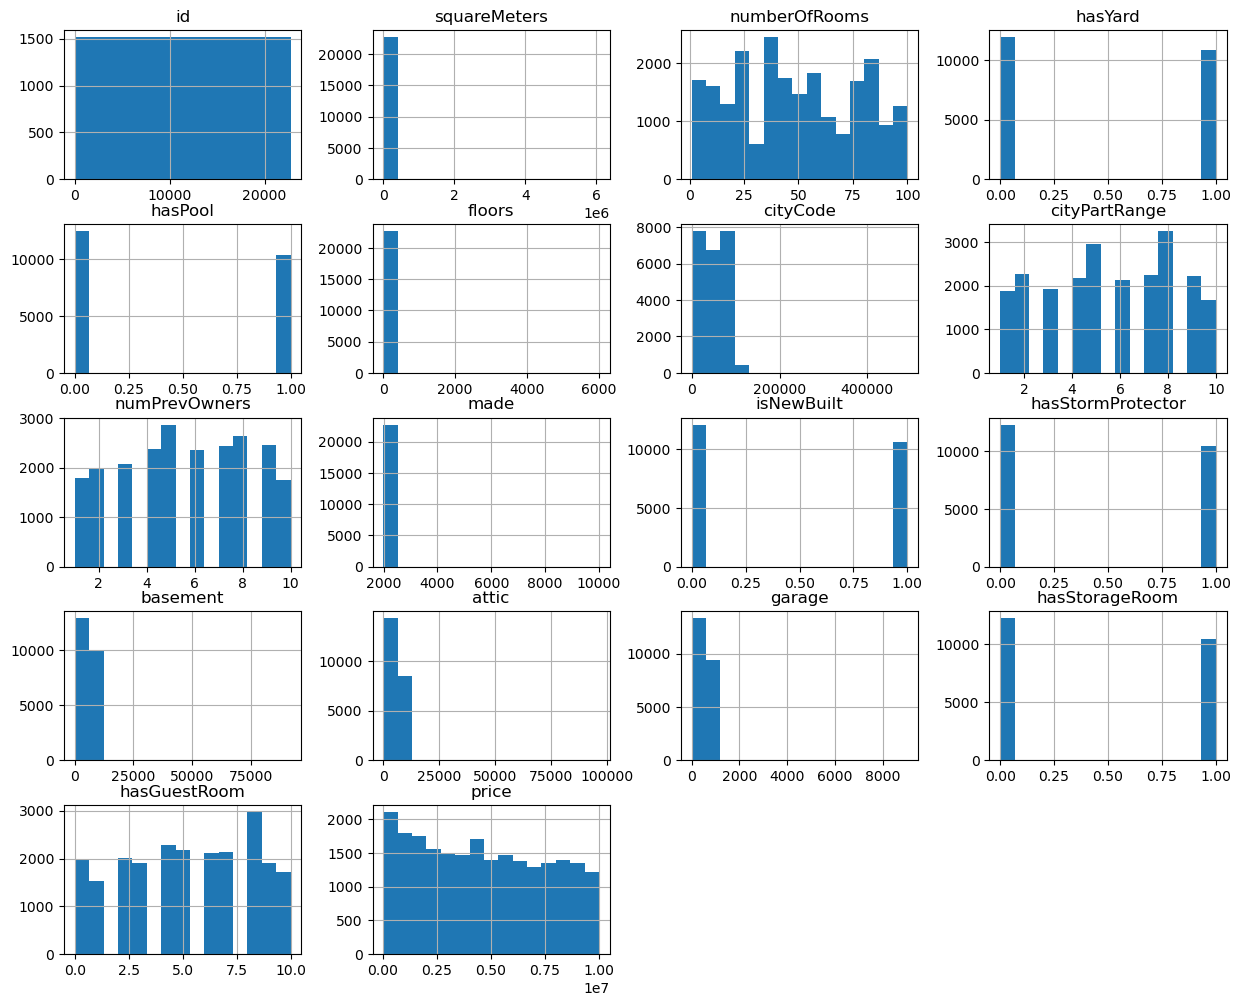

In [12]:
combined_df.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

<Axes: >

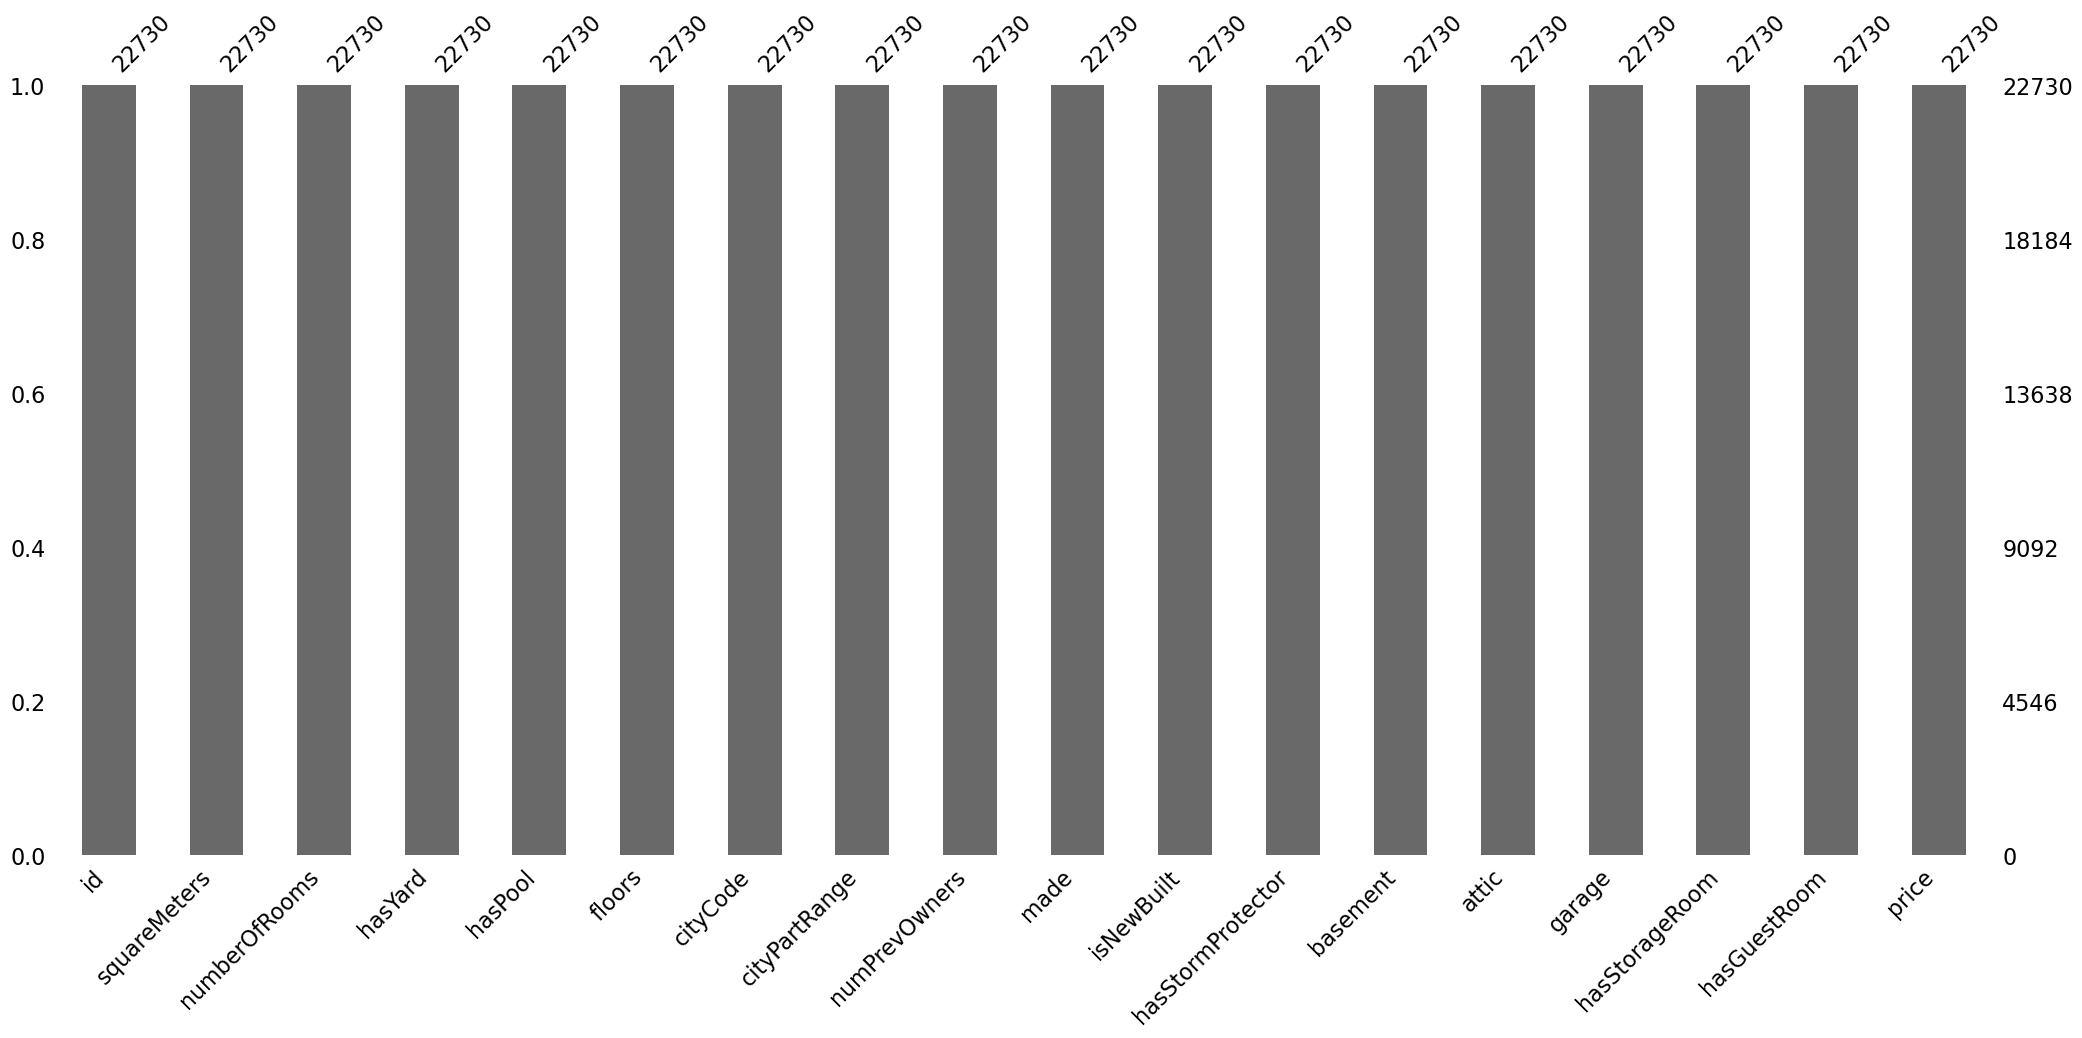

In [13]:
import missingno as msno
msno.bar(combined_df)

<Axes: >

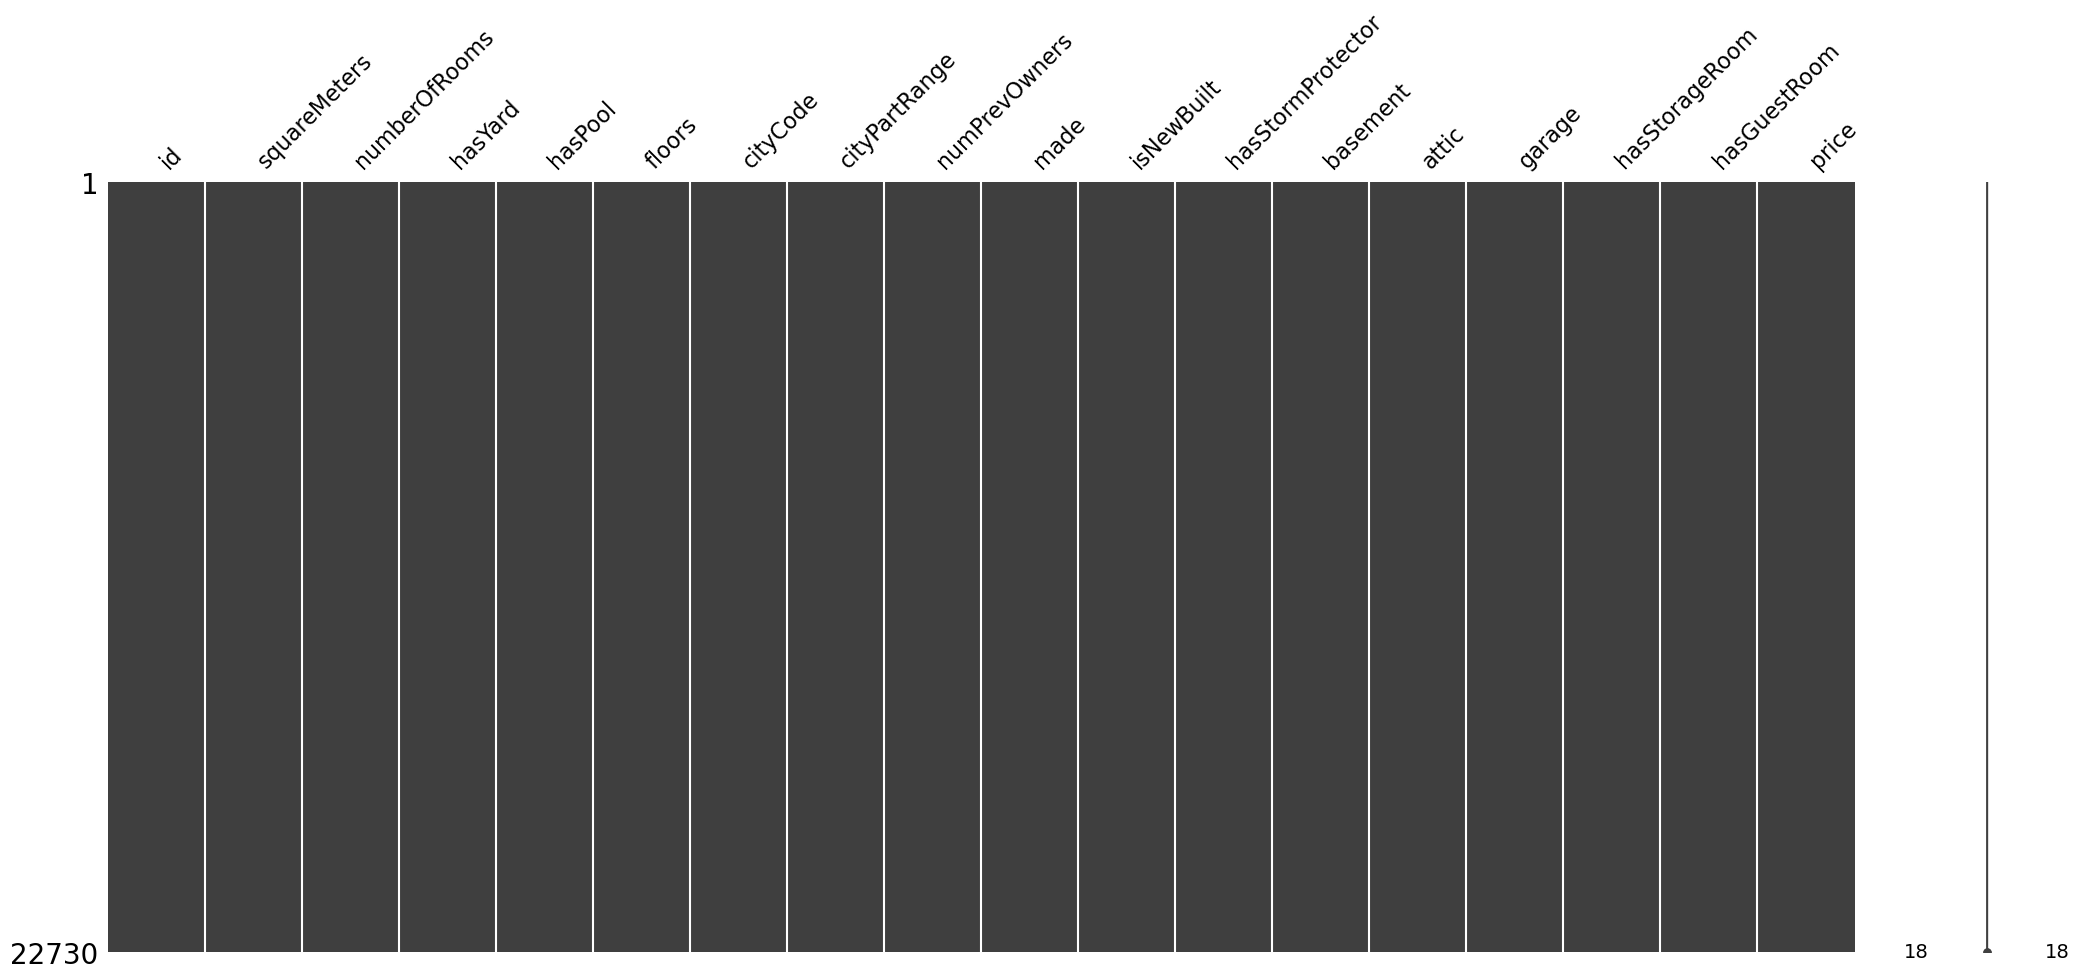

In [14]:
msno.matrix(combined_df)

<Axes: >

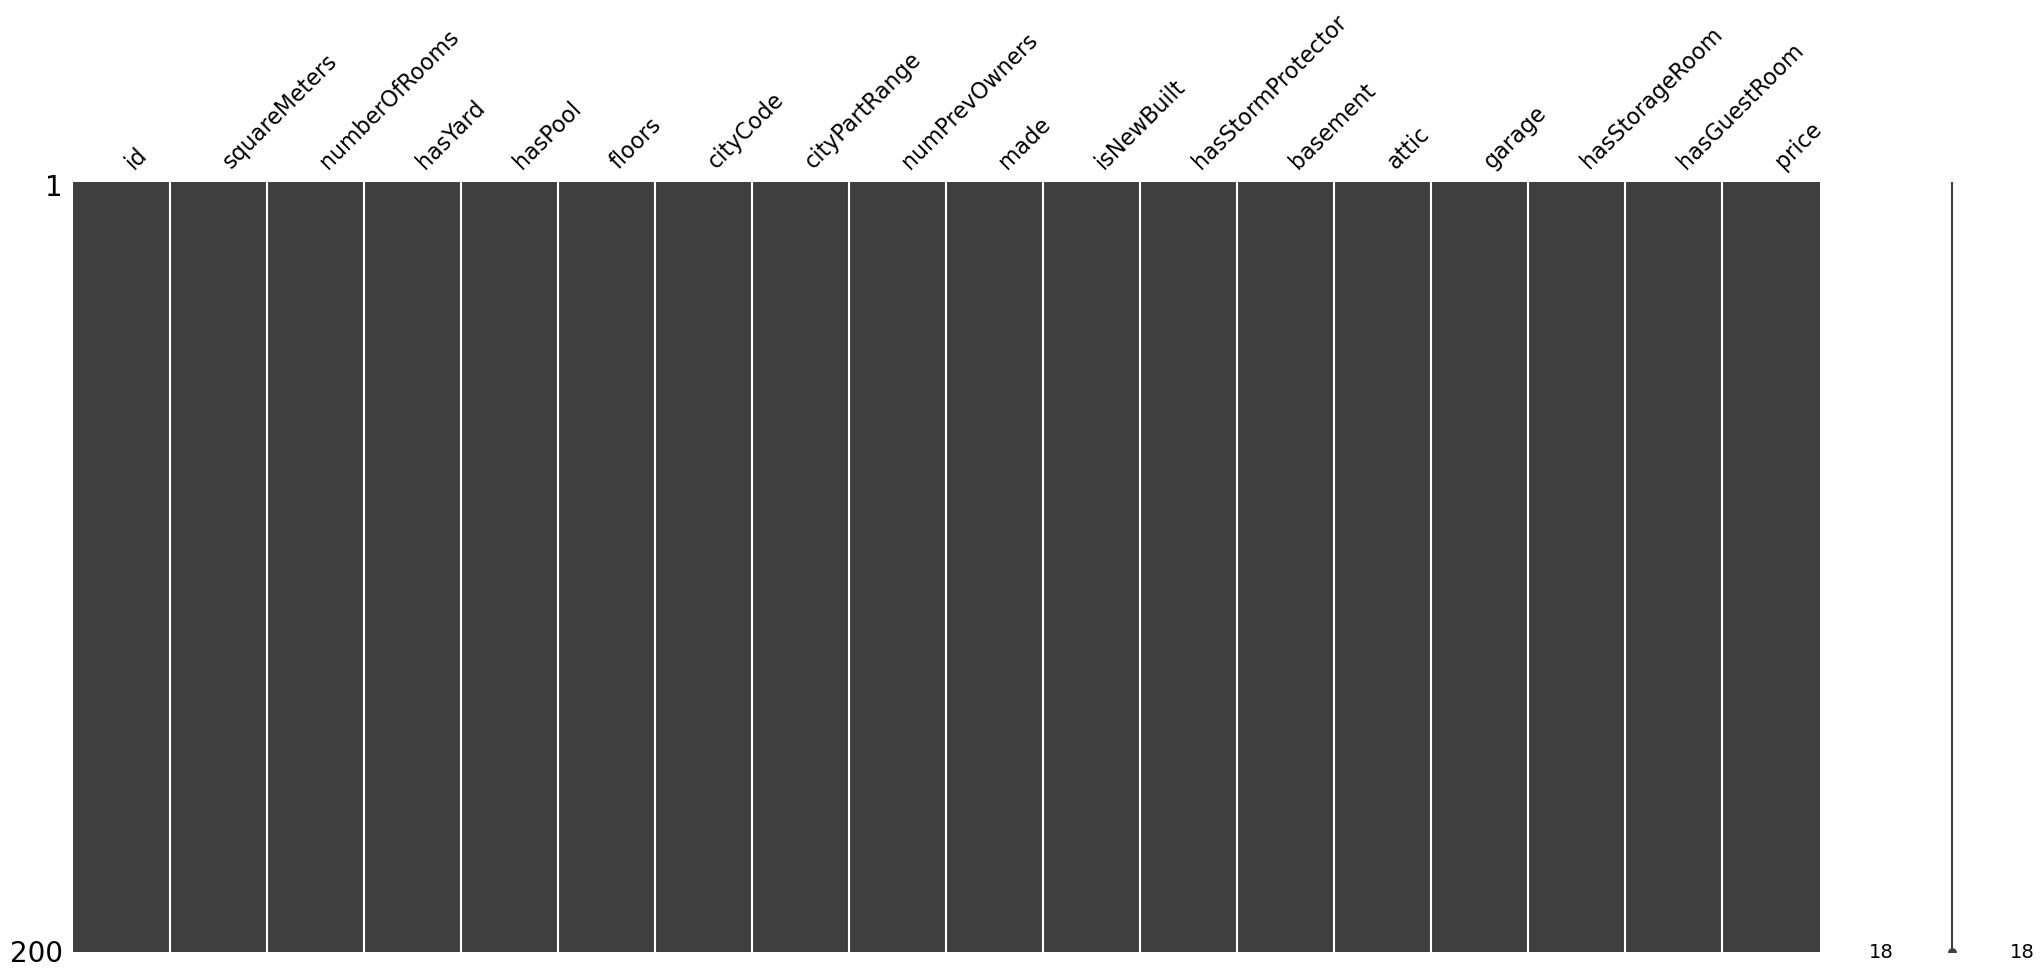

In [15]:
msno.matrix(combined_df.sample(200))

/opt/conda/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


<Axes: >

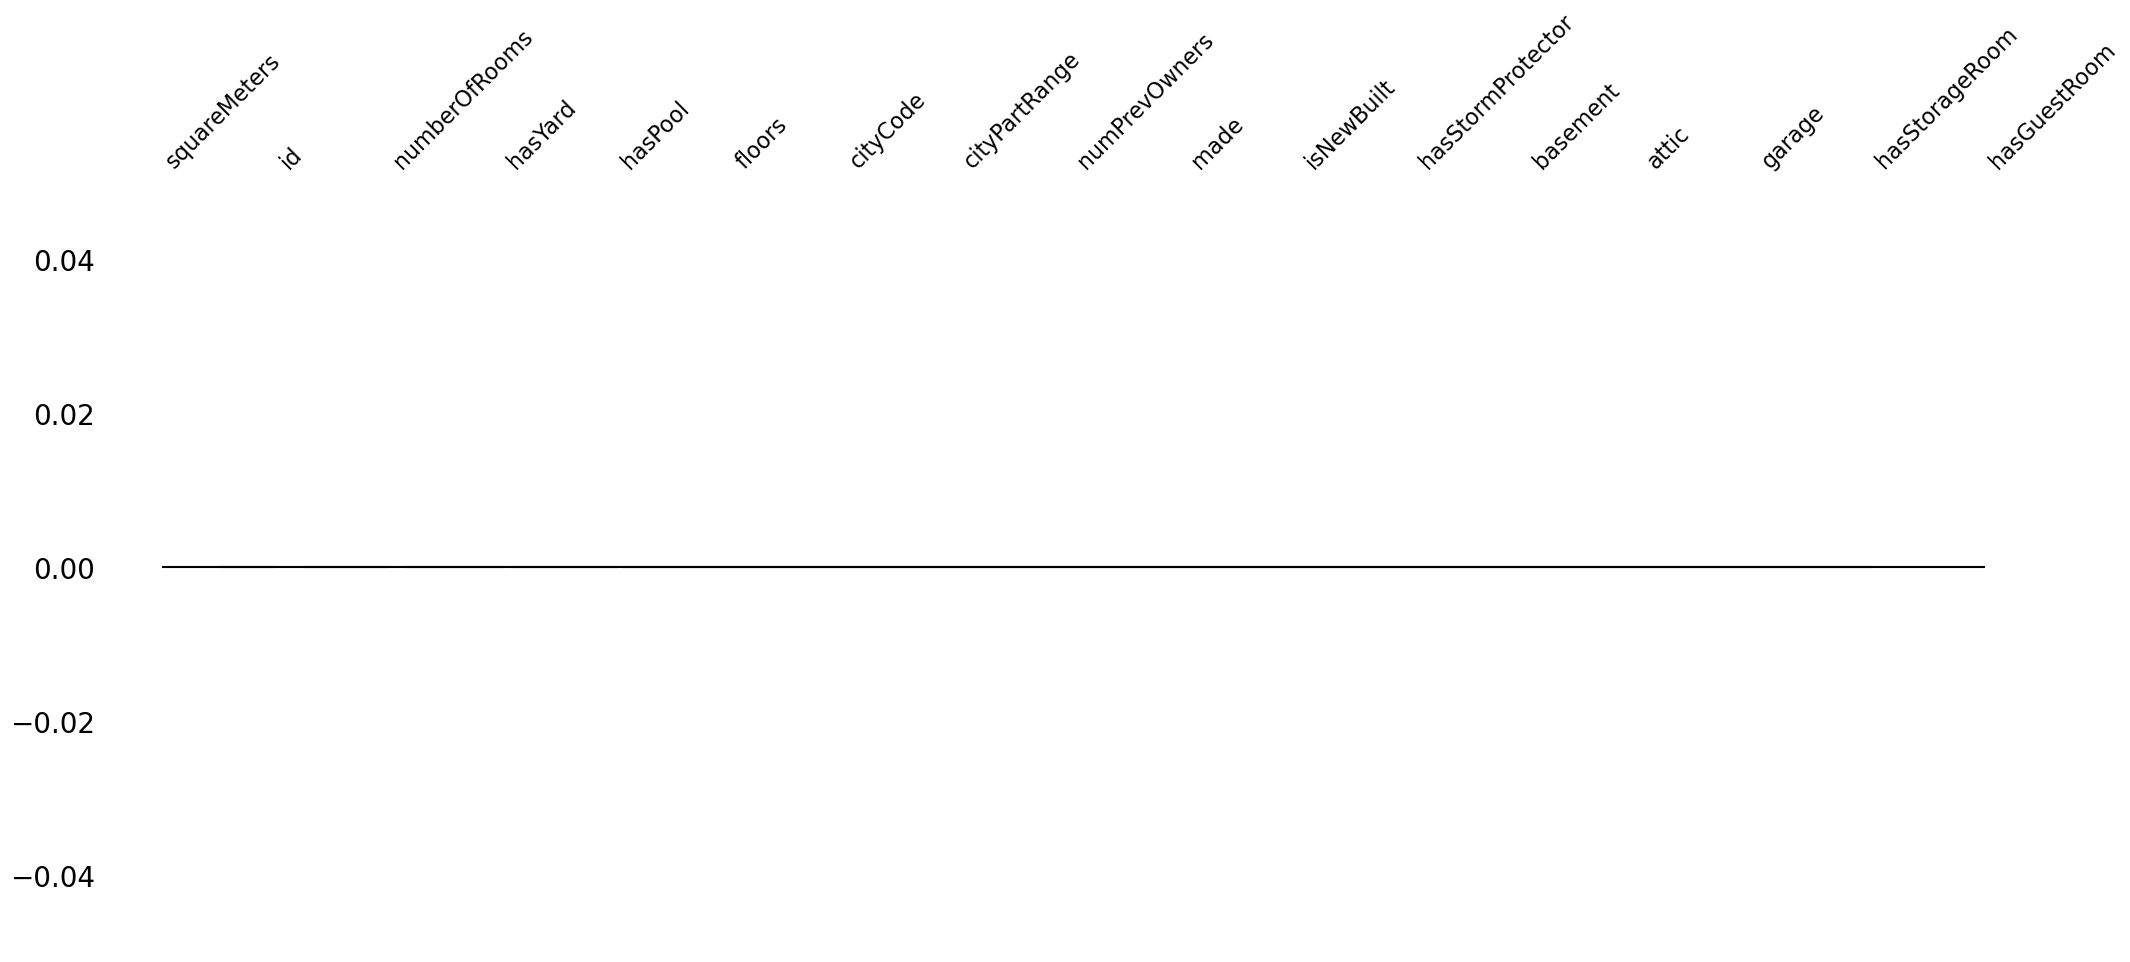

In [18]:
#msno.dendrogram(df)
msno.dendrogram(combined_df.drop('price', axis='columns'))

In [19]:
combined_df.isnull()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22725,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
print(combined_df.isnull().sum())

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64


In [21]:
print(combined_df['price'].unique())

[3436795.2 9519958.  9276448.1 ... 3661032.  1316580.1 8231424.8]


In [22]:
import numpy as np
from sklearn.decomposition import PCA

# Instantiate PCA with the desired number of components
pca = PCA(n_components=17)

# Fit PCA on the data
pca.fit(X)

# Transform the data to the principal components
X_pca = pca.transform(X)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the principal components
print("Principal Components:\n", pca.components_)


Explained Variance Ratio: [7.18324029e-01 2.63514538e-01 1.26080432e-02 2.82490791e-03
 2.70143988e-03 2.20027785e-05 4.13299743e-06 6.68232485e-07
 2.30388174e-07 2.73674545e-09 2.22011866e-09 2.12440692e-09
 7.88475381e-11 7.56665334e-11 7.14671531e-11 7.06541443e-11
 6.70515948e-11]
Principal Components:
 [[-1.73872545e-04  9.99818815e-01  3.22787965e-05 -6.53091077e-08
  -1.52799288e-08  1.72618971e-05  1.89881545e-02  1.57373946e-07
  -1.05744285e-08  3.57826673e-05  1.04183302e-07  1.79573736e-07
  -1.16935711e-03 -5.10458949e-04 -3.54275122e-04  6.12880770e-08
  -3.56551340e-07]
 [ 1.74740824e-03 -1.89866754e-02 -9.69159746e-06  4.96935140e-08
   1.37149897e-07  8.49790420e-06  9.99816477e-01  8.53600001e-07
  -3.43923417e-07  3.00436123e-05 -1.45338062e-08 -6.43085409e-08
   1.31767172e-04  1.85468370e-03  8.66473631e-05  1.06726592e-07
   3.15407114e-07]
 [ 9.99997413e-01  2.08863343e-04  1.66840168e-05 -1.05717375e-06
  -8.73875315e-07 -8.42805691e-05 -1.74563910e-03  5.32606

In [23]:

# Calculate the z-scores for each data point
z_scores = (X - X.mean()) / X.std()

# Set the threshold for outlier detection
threshold = 3

# Detect outliers
outliers = X[(z_scores > threshold).any(axis=1)]

# Print the outliers
print("Outliers:")
print(outliers)


Outliers:
          id  squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
299      299         40200             44        1        1      19    201035   
1326    1326         13591              6        0        1      20    491100   
2107    2107         28956            100        0        1      35     39767   
2113    2113         68038             41        0        0      54     87120   
2425    2425         25594             35        1        0      50    465360   
3608    3608         80062             81        1        0      35     67157   
3828    3828         31357             80        0        1      35     56962   
3995    3995         43758             14        0        0      93     62528   
4909    4909         26484             33        0        1      37     83634   
5659    5659         65029             50        0        1    6000     79146   
10987  10987         42211             78        0        1      52    200812   
12858  12858      

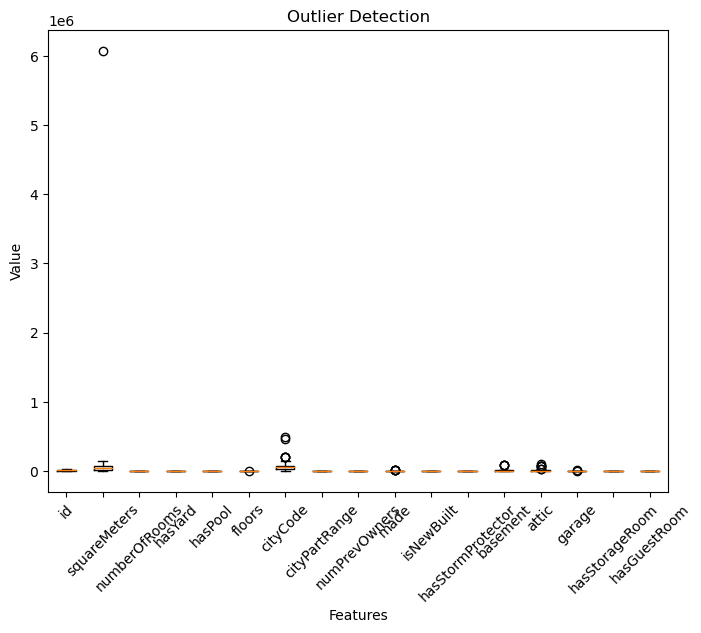

In [24]:
# Create a boxplot to visualize outliers
plt.figure(figsize=(8, 6))
plt.boxplot(X.values, labels=X.columns)
plt.title('Outlier Detection')
plt.ylabel('Value')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [72]:
def run_regression_analysis(X, y):
     # Reshape y to a 1-dimensional array
    y = y.values.ravel()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the regression models
    linear_regression = LinearRegression()
    decision_tree_regression = DecisionTreeRegressor()
    random_forest_regression = RandomForestRegressor()
    support_vector_regression = SVR()
    
    # Fit the regression models
    linear_regression.fit(X_train, y_train)
    decision_tree_regression.fit(X_train, y_train)
    random_forest_regression.fit(X_train, y_train)
    support_vector_regression.fit(X_train, y_train)
    
    # Predict on the test set
    linear_regression_predictions = linear_regression.predict(X_test)
    decision_tree_predictions = decision_tree_regression.predict(X_test)
    random_forest_predictions = random_forest_regression.predict(X_test)
    support_vector_predictions = support_vector_regression.predict(X_test)
    
    # Calculate evaluation metrics
    linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
    decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
    random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
    support_vector_mse = mean_squared_error(y_test, support_vector_predictions)
    
    linear_regression_mae = mean_absolute_error(y_test, linear_regression_predictions)
    decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
    random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
    support_vector_mae = mean_absolute_error(y_test, support_vector_predictions)
    
    linear_regression_r2 = r2_score(y_test, linear_regression_predictions)
    decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
    random_forest_r2 = r2_score(y_test, random_forest_predictions)
    support_vector_r2 = r2_score(y_test, support_vector_predictions)
    
    # Print results
    print("Linear Regression MSE:", linear_regression_mse)
    print("Decision Tree MSE:", decision_tree_mse)
    print("Random Forest MSE:", random_forest_mse)
    print("Support Vector MSE:", support_vector_mse)
    
    print("Linear Regression MAE:", linear_regression_mae)
    print("Decision Tree MAE:", decision_tree_mae)
    print("Random Forest MAE:", random_forest_mae)
    print("Support Vector MAE:", support_vector_mae)
    
    print("Linear Regression R-squared:", linear_regression_r2)
    print("Decision Tree R-squared:", decision_tree_r2)
    print("Random Forest R-squared:", random_forest_r2)
    print("Support Vector R-squared:", support_vector_r2)

In [73]:
# Example usage
# Assuming you have input data stored in X and output data stored in y as DataFrames
run_regression_analysis(X, y)

Linear Regression MSE: 4189364877822.2305
Decision Tree MSE: 62796147699.056435
Random Forest MSE: 48095198865.86323
Support Vector MSE: 8665970796451.026
Linear Regression MAE: 1756174.0459301684
Decision Tree MAE: 11822.394874615082
Random Forest MAE: 14040.63274854176
Support Vector MAE: 2542292.247895283
Linear Regression R-squared: 0.5152572858408329
Decision Tree R-squared: 0.9927339880955406
Random Forest R-squared: 0.9944350043703086
Support Vector R-squared: -0.0027214929245902297


In [74]:
def run_regression_analysis(X, y):
    # Reshape y to a 1-dimensional array
    y = y.values.ravel()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize the regression models
    linear_regression = LinearRegression()
    decision_tree_regression = DecisionTreeRegressor()
    random_forest_regression = RandomForestRegressor()
    
    # Fit the regression models
    linear_regression.fit(X_train, y_train)
    decision_tree_regression.fit(X_train, y_train)
    random_forest_regression.fit(X_train, y_train)
    
    # Predict on the test set
    linear_regression_predictions = linear_regression.predict(X_test)
    decision_tree_predictions = decision_tree_regression.predict(X_test)
    random_forest_predictions = random_forest_regression.predict(X_test)
    
    # Calculate evaluation metrics
    linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
    decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
    random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
    
    linear_regression_mae = mean_absolute_error(y_test, linear_regression_predictions)
    decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
    random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
    
    # Calculate residuals
    linear_regression_residuals = y_test - linear_regression_predictions
    decision_tree_residuals = y_test - decision_tree_predictions
    random_forest_residuals = y_test - random_forest_predictions
    
    # Print evaluation metrics
    print("Linear Regression MSE:", linear_regression_mse)
    print("Decision Tree MSE:", decision_tree_mse)
    print("Random Forest MSE:", random_forest_mse)
    
    print("Linear Regression MAE:", linear_regression_mae)
    print("Decision Tree MAE:", decision_tree_mae)
    print("Random Forest MAE:", random_forest_mae)
    
    # Plot residuals
    plt.scatter(y_test, linear_regression_residuals, label='Linear Regression')
    plt.scatter(y_test, decision_tree_residuals, label='Decision Tree')
    plt.scatter(y_test, random_forest_residuals, label='Random Forest')
    plt.xlabel('Actual Values')
    plt.ylabel('Residuals')
    plt.title('Residual Analysis')
    plt.legend()
    plt.show()

Linear Regression MSE: 4189364877822.2305
Decision Tree MSE: 56689540463.461205
Random Forest MSE: 50728303132.38054
Linear Regression MAE: 1756174.0459301684
Decision Tree MAE: 10788.025604927447
Random Forest MAE: 14595.824785503075


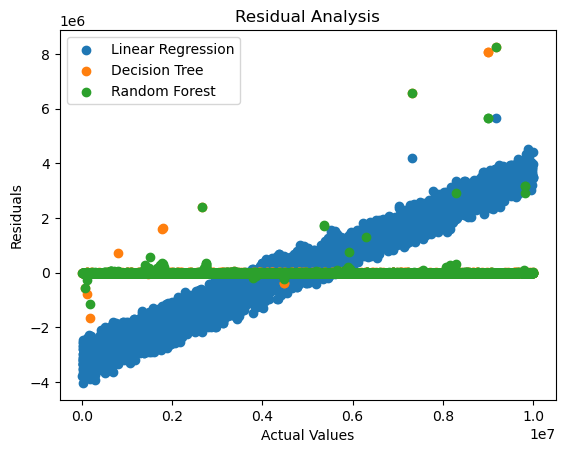

In [75]:
# Example usage
# Assuming you have input values stored in X and output values stored in y as NumPy arrays
run_regression_analysis(X, y)